In [1]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

2023-10-23 00:59:43.851014: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-23 00:59:43.851051: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-23 00:59:43.851774: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-23 00:59:43.933160: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-23 00:59:45.158996: W tensorflow/compiler/

In [2]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_review = "".join([reverse_word_index.get(i - 3, "?") for i in train_data[0]])
print(decoded_review)


?thisfilmwasjustbrilliantcastinglocationscenerystorydirectioneveryone'sreallysuitedtheparttheyplayedandyoucouldjustimaginebeingthererobert?isanamazingactorandnowthesamebeingdirector?fathercamefromthesamescottishislandasmyselfsoilovedthefacttherewasarealconnectionwiththisfilmthewittyremarksthroughoutthefilmweregreatitwasjustbrilliantsomuchthatiboughtthefilmassoonasitwasreleasedfor?andwouldrecommendittoeveryonetowatchandtheflyfishingwasamazingreallycriedattheenditwassosadandyouknowwhattheysayifyoucryatafilmitmusthavebeengoodandthisdefinitelywasalso?tothetwolittleboy'sthatplayedthe?ofnormanandpaultheywerejustbrilliantchildrenareoftenleftoutofthe?listithinkbecausethestarsthatplaythemallgrownuparesuchabigprofileforthewholefilmbutthesechildrenareamazingandshouldbepraisedforwhattheyhavedonedon'tyouthinkthewholestorywassolovelybecauseitwastrueandwassomeone'slifeafterallthatwassharedwithusall


In [3]:
import numpy as np

def vecotorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results

x_train = vecotorize_sequences(train_data)
x_test = vecotorize_sequences(test_data)

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

In [4]:
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

2023-10-23 00:59:59.900076: E tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:268] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected


In [6]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)


In [7]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [8]:
history = model.fit(
    partial_x_train,
    partial_y_train,
    epochs=20,
    batch_size=128,
    validation_data=(x_val, y_val))

2023-10-23 01:00:02.387705: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 600000000 exceeds 10% of free system memory.


Epoch 1/20
117/118 [============================>.] - ETA: 0s - loss: 0.4174 - accuracy: 0.8355

2023-10-23 01:00:05.803706: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 400000000 exceeds 10% of free system memory.


118/118 [==============================] - 3s 22ms/step - loss: 0.4172 - accuracy: 0.8356 - val_loss: 0.3345 - val_accuracy: 0.8611
Epoch 2/20
118/118 [==============================] - 1s 8ms/step - loss: 0.2260 - accuracy: 0.9171 - val_loss: 0.2782 - val_accuracy: 0.8887
Epoch 3/20
118/118 [==============================] - 1s 8ms/step - loss: 0.1674 - accuracy: 0.9393 - val_loss: 0.3141 - val_accuracy: 0.8752
Epoch 4/20
118/118 [==============================] - 1s 8ms/step - loss: 0.1294 - accuracy: 0.9546 - val_loss: 0.3851 - val_accuracy: 0.8639
Epoch 5/20
118/118 [==============================] - 1s 8ms/step - loss: 0.1045 - accuracy: 0.9659 - val_loss: 0.3605 - val_accuracy: 0.8772
Epoch 6/20
118/118 [==============================] - 1s 8ms/step - loss: 0.0838 - accuracy: 0.9737 - val_loss: 0.3818 - val_accuracy: 0.8770
Epoch 7/20
118/118 [==============================] - 1s 8ms/step - loss: 0.0663 - accuracy: 0.9780 - val_loss: 0.4269 - val_accuracy: 0.8738
Epoch 8/20
118/1

In [9]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


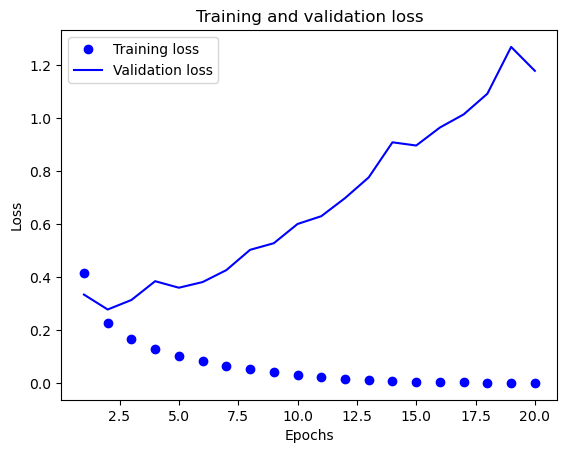

In [10]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

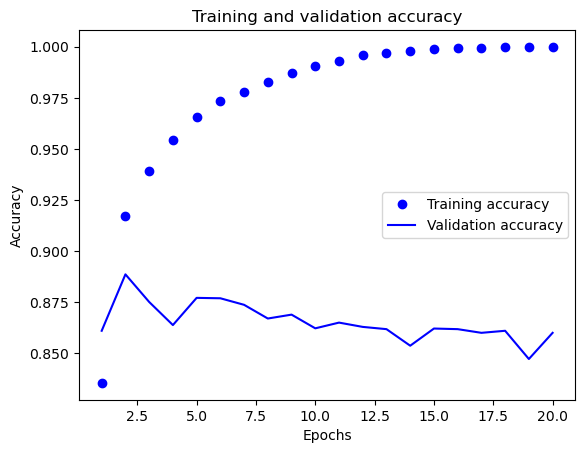

In [11]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training accuracy")
plt.plot(epochs, val_acc, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [12]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [13]:
model.compile(
    optimizer="rmsprop",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

In [14]:
model.fit(
    x_train, 
    y_train, 
    epochs=4,
    batch_size=128
)

2023-10-23 01:00:31.594623: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1000000000 exceeds 10% of free system memory.


Epoch 1/4
196/196 [==============================] - 2s 6ms/step - loss: 0.3575 - accuracy: 0.8599
Epoch 2/4
196/196 [==============================] - 1s 6ms/step - loss: 0.2128 - accuracy: 0.9181
Epoch 3/4
196/196 [==============================] - 1s 6ms/step - loss: 0.1719 - accuracy: 0.9362
Epoch 4/4
196/196 [==============================] - 1s 6ms/step - loss: 0.1457 - accuracy: 0.9467


In [15]:
results = model.evaluate(x_test, y_test)

2023-10-23 01:00:46.316513: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 [==============================] - 2s 2ms/step - loss: 0.3433 - accuracy: 0.8736


In [16]:
print(results)

[0.3433210849761963, 0.8735600113868713]


In [17]:
model.predict(x_test)

2023-10-23 01:02:23.236575: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1000000000 exceeds 10% of free system memory.


782/782 [==============================] - 2s 2ms/step


array([[0.0872409 ],
       [0.9999352 ],
       [0.5806479 ],
       ...,
       [0.15599284],
       [0.01938763],
       [0.5776243 ]], dtype=float32)